# Classificação de dígitos utilizando HOG e k-vizinhos

### 1. Pré-processamento dos dados

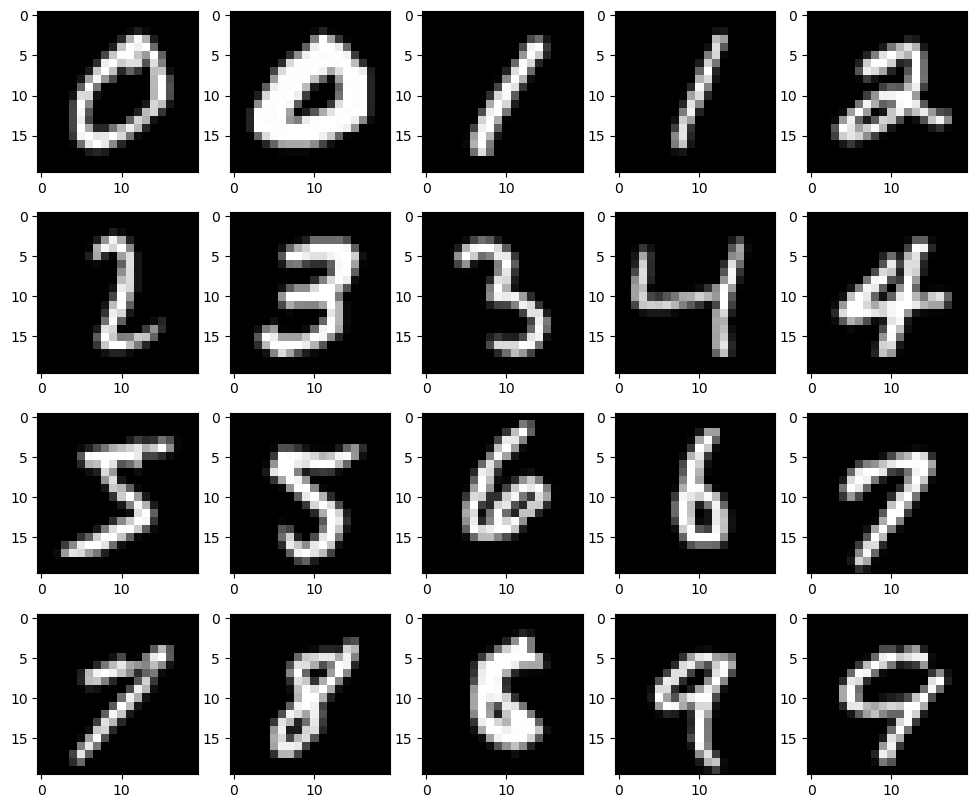

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import os

def read_digits(directory):
    '''Retorna uma lista contendo todas as imagens de dígitos dentro do diretório'''

    files = sorted(os.listdir(directory))
    digit_images = []
    labels = []
    for file in files:
        img = plt.imread(directory+'/'+file)
        digit_images.append(img)
        label = int(file.split('.')[0].split('_')[1])
        labels.append(label)
    
    return digit_images, labels

digits_per_class = 250
train_imgs, train_labels = read_digits('digits/train')
test_imgs, test_labels = read_digits('digits/test')
    
# Mostra 2 dígitos de cada classe
k = 0
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_imgs[k], 'gray')
    k += digits_per_class//2

### 2. Criação do descritor HOG e aplicação nas imagens de treinamento

In [10]:
def hog_properties(img_list, nbins, cell_size, block_size):
    ''' Calcula atributos HOG para cada imagem de `img_list`'''
    
    hog_data = []
    for img in img_list:
        hog = skimage.feature.hog(img, orientations=nbins, 
                                  pixels_per_cell=cell_size, 
                                  cells_per_block=block_size)
        hog_data.append(hog)
    
    return np.array(hog_data)

nbins = 9                 # Número de caixas no histograma
cell_size = (5, 5)        # Tamanho da célula (quadrados verdes nos slides)
block_size = (2, 2)       # Tamanho do bloco (quadrado azul nos slides), em nro de células
# Com os parâmetros utilizados, cada bloco possui 4 células de tamanho 5x5. Portanto, teremos 
# 9 blocos ao longo da imagem. Cada célula define um histograma de 9 caixas. Com isso, teremos
# 9 (blocos) * 4 (células por bloco) * 9 (valores por célula) = 324 atributos associados com 
# cada imagem

train_data = hog_properties(train_imgs, nbins, cell_size, block_size)
# Imprime os atributos HOG para a primeia imagem
print(train_data[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.10643460e-02 2.72367179e-01
 7.50853196e-02 9.70237132e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.15497418e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.35129760e-02
 6.49759829e-01 6.49759829e-01 5.53120226e-02 2.35948876e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.42764335e-02 1.29485726e-01 3.56962122e-02
 4.61259158e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.23382851e-02 0.00000000e+00 3.56982261e-01
 1.43274069e-01 2.57844985e-01 9.75090861e-02 3.08783919e-01
 9.57965404e-02 0.00000000e+00 1.59323607e-02 3.56982261e-01
 3.56982261e-01 2.62958165e-02 1.12172149e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.43557408e-01
 6.83262125e-02 9.263158

### 3. "Treinamento" do classificador k-vizinhos

O classificador k-vizinhos é conhecido como lazy, pois na verdade não é feito nenhum cálculo durante o treinamento. A parte mais pesada computacionalmente é feita somente no momento da classificação. 

Outros classificadores como o SVM fazem os cálculos mais pesados no momento do treinamento e são muito mais rápidos do que o k-vizinhos no momento da classificação.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# "Treina" o classificador. 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=3)

### 4. Teste da acurácia do classificador

Agora, testamos como o nosso sistema lida com imagens que não foram utilizadas no treinamento.

In [12]:
test_data = hog_properties(test_imgs, nbins, cell_size, block_size)

# Classifica as imagens utilizando os 3 vizinhos mais próximos. result é
# um array indicando o índice da classe de cada imagem de teste, neighbors
# é uma matriz na qual cada linha i indica a classe dos k pontos mais próximos
# ao ponto i e dist é uma matriz na qual cada linha i indica a distância entre
# o ponto i e os k vizinhos mais próximos
result = knn.predict(test_data)

# Calcula porcentagem de acerto, dada pelo número de valores que são iguais em result
# e responses dividido pelo número de imagens de teste. Aqui podemos utilizar a variável
# labels criada anteriormente porque o conjunto de testes possui o mesmo número de imagens
# que o conjunto de treinamento.
mask = result==test_labels
num_equal = np.sum(mask)
print("Accurácia: {}%".format(100*num_equal/len(result)))

Accurácia: 93.56%
